Annalena Bebenroth (999523) und Maluna Hennecke (1007701) und Linus Kleine Kruthaup (978617)

In [1]:
from brian2 import *
from scipy import stats
import matplotlib.pyplot  as plt
import numpy as np

In [2]:
%matplotlib inline

## Question 1

In [4]:
def neuron_fct(I, refrac, sim_time): 
    # Leaky-Integrate-And-Fire
    V_r = -70 * mV
    g_l = 0.1 * usiemens
    V_t = -50 * mV
    tau = 20.0 * ms
    #I = 5.0 * nA
    #refrac = 3.0 * ms

    eqs = """
    dV/dt = 1/tau * (-(V - V_r) + (1/g_l) * I) : volt
    """

    LIF_neuron = NeuronGroup(1, eqs, threshold="V > V_t", reset = "V=V_r", refractory=refrac, method="exponential_euler")

    state_monitor = StateMonitor(LIF_neuron, ["V"], record=True)
    spike_monitor = SpikeMonitor(LIF_neuron)

    LIF_neuron.V = -70 *mV

    LF_net = Network(LIF_neuron)
    LF_net.add(state_monitor)
    LF_net.add(spike_monitor)

    LF_net.run(sim_time)
    return state_monitor, spike_monitor

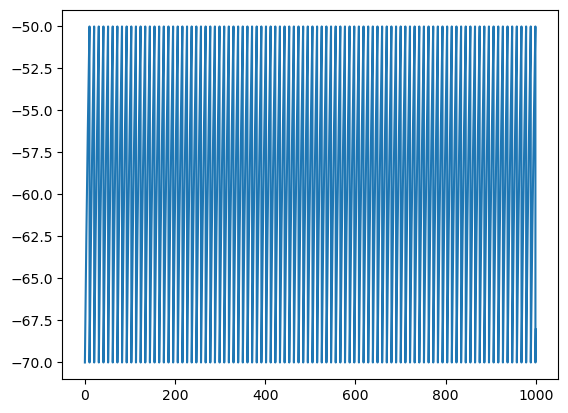

In [35]:
#states, spikes = neuron_fct(I= 5.0 * nA, refrac=3.0 * ms, sim_time=1*second)
#plt.plot(states.t/ms, states.V[0]/msiemens)
# plt.vlines

In [46]:
def f_I(I, refrac):
    _, spike = neuron_fct(I, refrac, 1* second)
    return len(spike)
x_currents = np.linspace(0.0,20.0, num=50)
# 4.0 = refractory period
frequency = [f_I(current *namp, 4.0*ms) for current in x_currents]

Text(0, 0.5, 'response frequency in Hz')

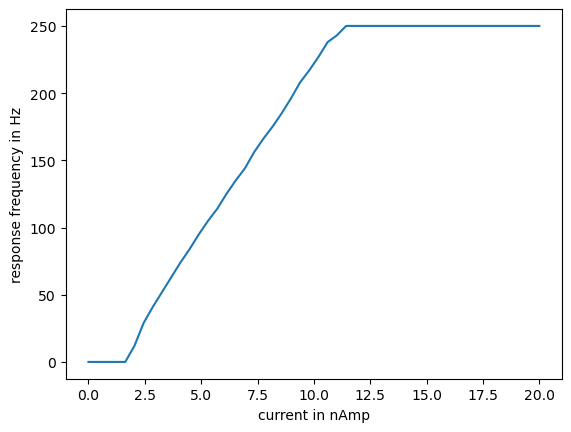

In [47]:
plt.plot(x_currents, frequency)
plt.xlabel("current in nAmp")
plt.ylabel("response frequency in Hz")

## Question 2

In [40]:
# second part
def synaptic_fct(input_rate, refrac, sim_time):
    #refrac = 3.0 *ms
    #input_rate = 20.0 * Hz
    #sim_time = 25.0 * ms

    V_r =  -70 *mV
    V_t = -50 * mV
    E_s = 10.0 * mV
    g_l  = 3.0 * msiemens

    tau_m = 20.0 * ms
    tau_s = 5.0* ms

    poisson_input = PoissonGroup(10, np.arange(10) * Hz + input_rate)

    eqs = """
    dV/dt = -1/tau_m * ((V-V_r) + (g_s/g_l) * (V-E_s)) : volt
    dg_s/dt = (-1/tau_s) * g_s :siemens
    """

    LIF_neuron = NeuronGroup(1, eqs, threshold="V > V_t", reset = "V=V_r", refractory=refrac, method="exponential_euler")

    # set V

    conductance_synapses = Synapses(poisson_input, LIF_neuron, on_pre='g_s += 0.6*msiemens')
    conductance_synapses.connect()

    state_monitor = StateMonitor(LIF_neuron, ["V"], record=True)
    spike_monitor = SpikeMonitor(LIF_neuron)

    LIF_neuron.V = -70 *mV
    LIF_neuron.g_s = 0*mS

    LF_net = Network(LIF_neuron)
    LF_net.add(conductance_synapses)
    LF_net.add(poisson_input)
    LF_net.add(state_monitor)
    LF_net.add(spike_monitor)

    LF_net.run(sim_time)
    return state_monitor, spike_monitor

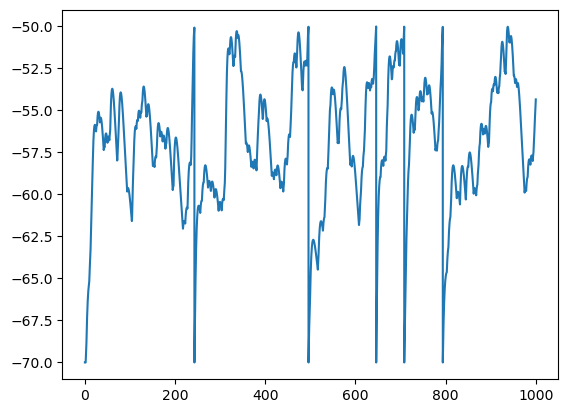

In [41]:
#states, spikes = synaptic_fct(input_rate=20.0 * Hz, refrac=3.0 * ms, sim_time=1*second)
#plt.plot(states.t/ms, states.V[0]/msiemens)
# plt.vlines

In [42]:
# same as f_I but vary Hz
def f_f(Hz, refrac):
    _, spike = synaptic_fct(Hz, refrac, 1* second)
    return len(spike)
x_freq = np.linspace(0.0,200.0, num=20)
# 4.0 = refractory period
frequency = [f_f(freq *Hz, 4.0*ms) for freq in x_freq]

Text(0, 0.5, 'response frequency in Hz')

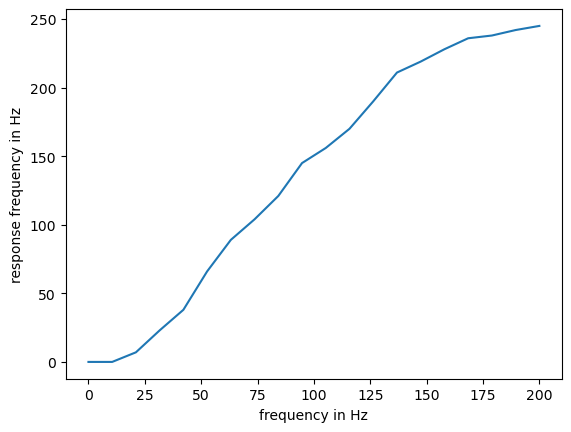

In [45]:
plt.plot(x_freq, frequency)
plt.xlabel("frequency in Hz")
plt.ylabel("response frequency in Hz")